Copyright (C) 1997-2009 The R Core Team

In [1]:
require(stats); require(graphics); require(datasets)
op <- par(mfrow = c(1,1))

In [2]:
x1 <- c(4, 1, 3, 6, 6, 4, 1, 6, 2, 4, 2) # very artificial

(x3R <- smooth(x1, "3R")) # 2 iterations of "3"

3R Tukey smoother resulting from  smooth(x = x1, kind = "3R") 
 used 2 iterations
 [1] 3 3 3 6 6 4 4 4 2 2 2

In [3]:
smooth(x3R, kind = "S")

S Tukey smoother resulting from  smooth(x = x3R, kind = "S") 
 changed
 [1] 3 3 3 3 4 4 4 4 2 2 2

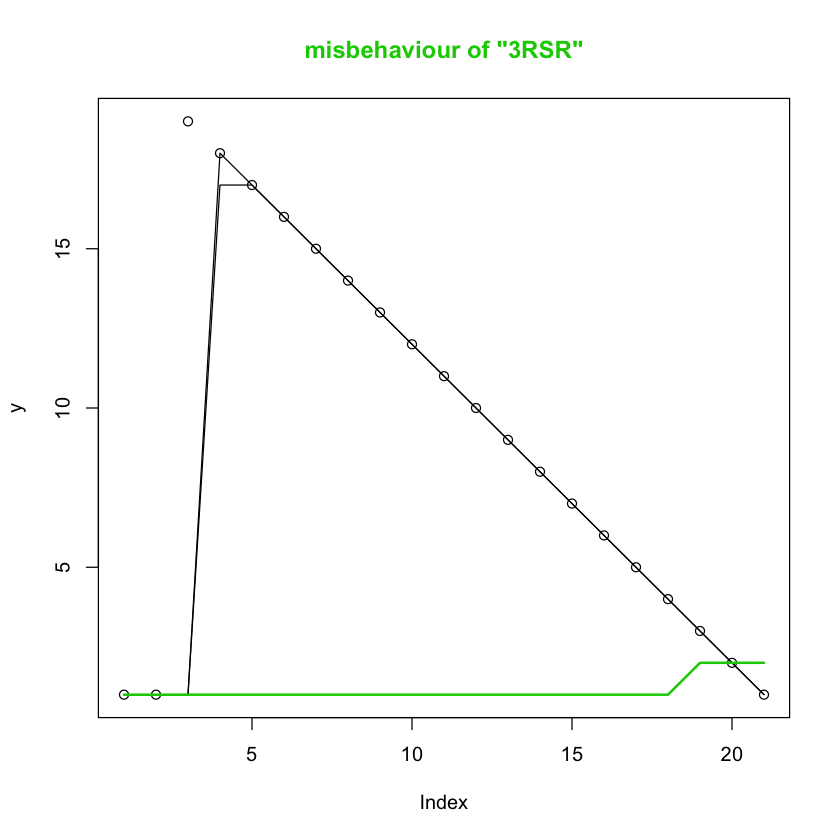

In [4]:
sm.3RS <- function(x, ...)
   smooth(smooth(x, "3R", ...), "S", ...)
y <- c(1, 1, 19:1)
plot(y, main = "misbehaviour of \"3RSR\"", col.main = 3)

lines(sm.3RS(y))
lines(smooth(y))
lines(smooth(y, "3RSR"), col = 3, lwd = 2)  # the horror

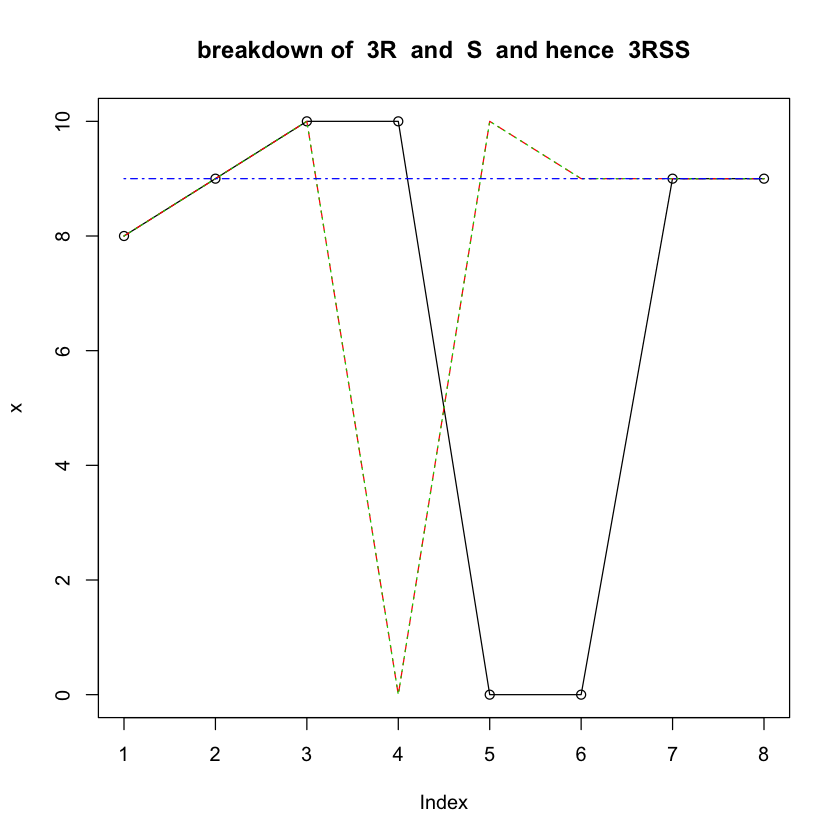

In [5]:
x <- c(8:10, 10, 0, 0, 9, 9)
plot(x, main = "breakdown of  3R  and  S  and hence  3RSS")
matlines(cbind(smooth(x, "3R"), smooth(x, "S"), smooth(x, "3RSS"), smooth(x)))
presidents[is.na(presidents)] <- 0 # silly

In [6]:
summary(sm3 <- smooth(presidents, "3R"))

3R Tukey smoother resulting from
 smooth(x = presidents, kind = "3R") ;  n = 120 
 used 4 iterations


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0    44.0    57.0    54.2    71.0    82.0 

In [7]:
summary(sm2 <- smooth(presidents,"3RSS"))

3RSS Tukey smoother resulting from
 smooth(x = presidents, kind = "3RSS") ;  n = 120 
 used 5 iterations


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   44.00   57.00   55.45   69.00   82.00 

In [8]:
summary(sm  <- smooth(presidents))

3RS3R Tukey smoother resulting from
 smooth(x = presidents) ;  n = 120 
 used 7 iterations


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  24.00   44.00   57.00   55.88   69.00   82.00 

In [9]:
all.equal(c(sm2), c(smooth(smooth(sm3, "S"), "S")))  # 3RSS  === 3R S S

[1] TRUE

In [10]:
all.equal(c(sm),  c(smooth(smooth(sm3, "S"), "3R"))) # 3RS3R === 3R S 3R

[1] TRUE

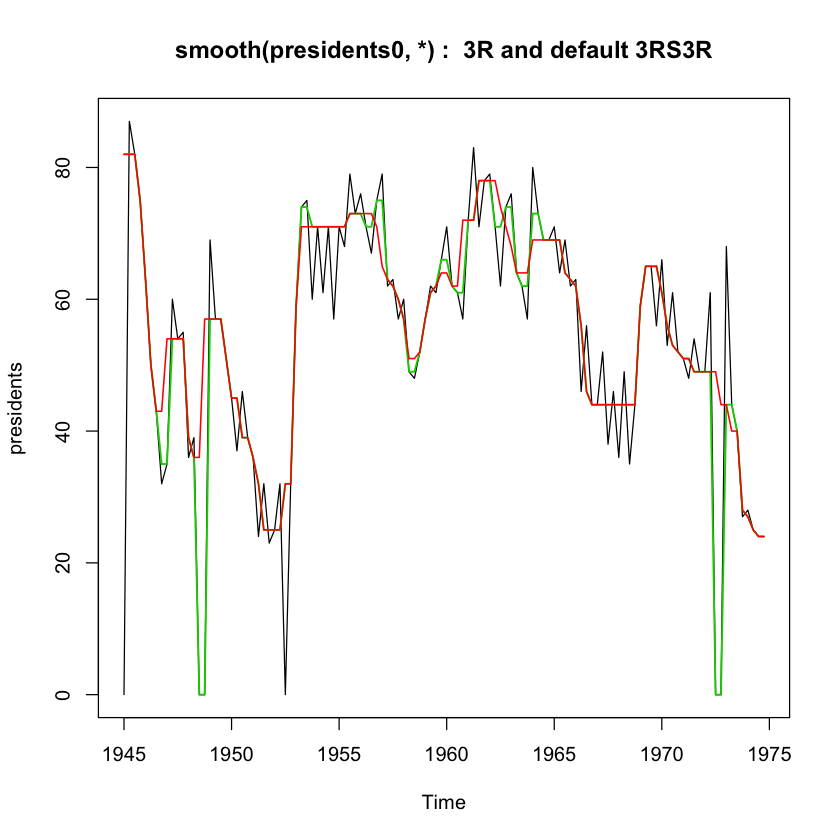

In [11]:
plot(presidents, main = "smooth(presidents0, *) :  3R and default 3RS3R")
lines(sm3, col = 3, lwd = 1.5)
lines(sm, col = 2, lwd = 1.25)

In [12]:
## Didactical investigation:

showSmooth <- function(x, leg.x = 1, leg.y = max(x)) {
  ss <- cbind(x, "3c"  = smooth(x, "3", end="copy"),
                 "3"   = smooth(x, "3"),
                 "3Rc" = smooth(x, "3R", end="copy"),
                 "3R"  = smooth(x, "3R"),
              sm = smooth(x))
  k <- ncol(ss) - 1
  n <- length(x)
  slwd <- c(1,1,4,1,3,2)
  slty <- c(0, 2:(k+1))
  matplot(ss, main = "Tukey Smoothers", ylab = "y ;  sm(y)",
          type= c("p",rep("l",k)), pch= par("pch"), lwd= slwd, lty= slty)
  legend(leg.x, leg.y,
         c("Data",       "3   (copy)", "3  (Tukey)",
                 "3R  (copy)", "3R (Tukey)", "smooth()"),
         pch= c(par("pch"),rep(-1,k)), col=1:(k+1), lwd= slwd, lty= slty)
  ss
}

## 4 simple didactical examples, showing different steps in smooth():

    [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
x      4    6    2    2    6    3    6    6    5     2
3c     4    4    2    2    3    6    6    6    5     2
3      4    4    2    2    3    6    6    6    5     3
3Rc    4    4    2    2    3    6    6    6    5     2
3R     4    4    2    2    3    6    6    6    5     3
sm     4    4    4    3    3    6    6    6    5     3


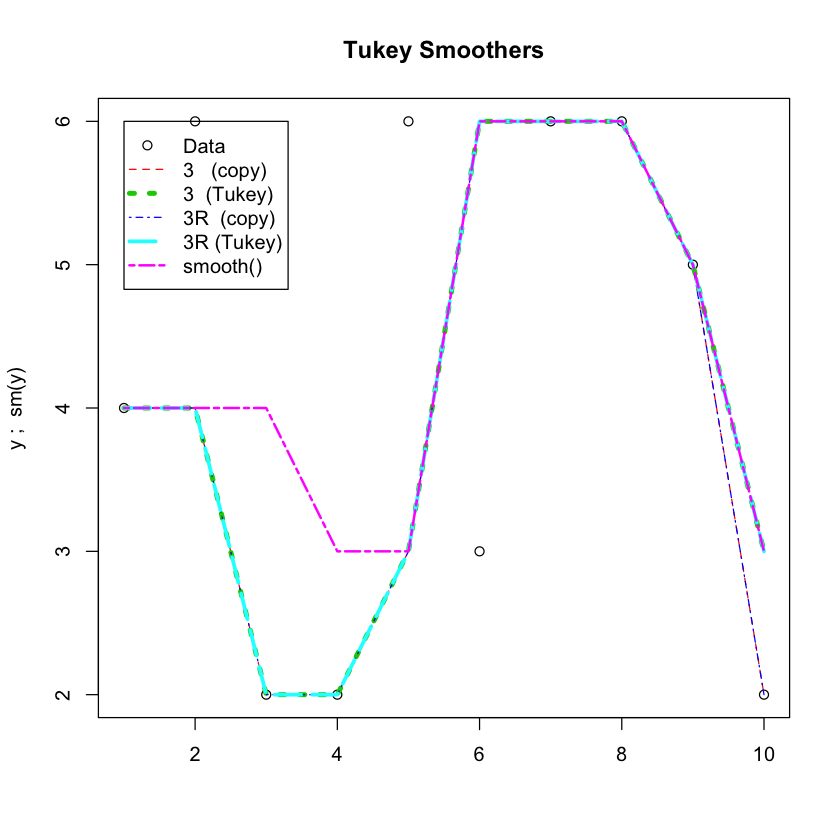

In [13]:
print(t(showSmooth(c(4, 6, 2, 2, 6, 3, 6, 6, 5, 2))))

    [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11]
x      3    2    1    4    5    1    3    2    4     5     2
3c     3    2    2    4    4    3    2    3    4     4     2
3      2    2    2    4    4    3    2    3    4     4     4
3Rc    3    2    2    4    4    3    3    3    4     4     2
3R     2    2    2    4    4    3    3    3    4     4     4
sm     2    2    2    2    3    3    3    3    4     4     4


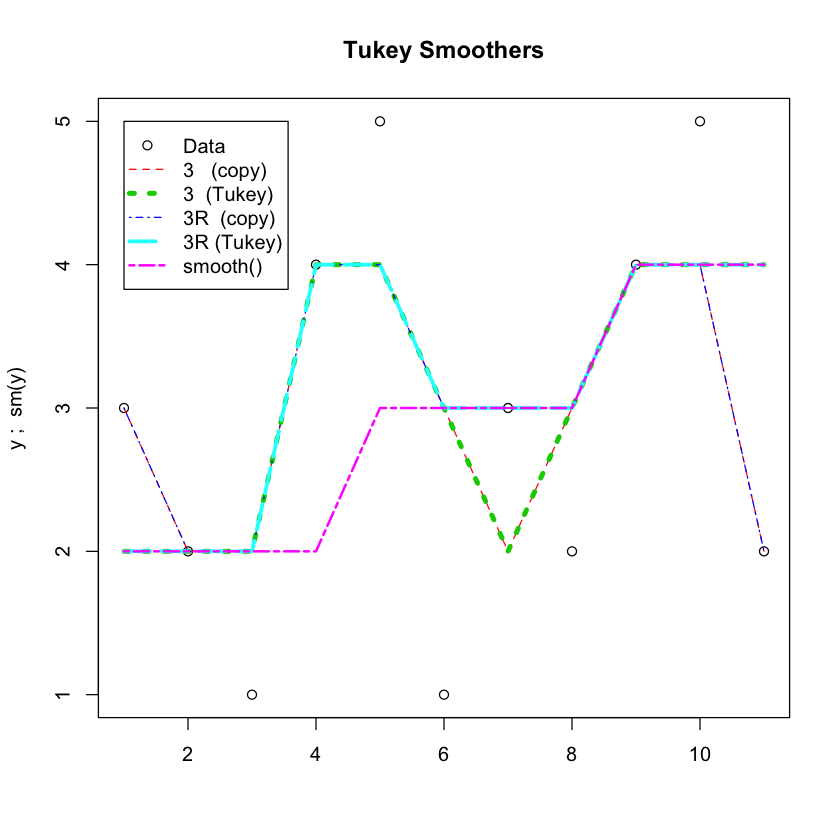

In [14]:
print(t(showSmooth(c(3, 2, 1, 4, 5, 1, 3, 2, 4, 5, 2))))

    [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11]
x      2    4    2    6    1    1    2    6    3     1     6
3c     2    2    4    2    1    1    2    3    3     3     6
3      2    2    4    2    1    1    2    3    3     3     3
3Rc    2    2    2    2    1    1    2    3    3     3     6
3R     2    2    2    2    1    1    2    3    3     3     3
sm     2    2    2    2    2    2    2    3    3     3     3


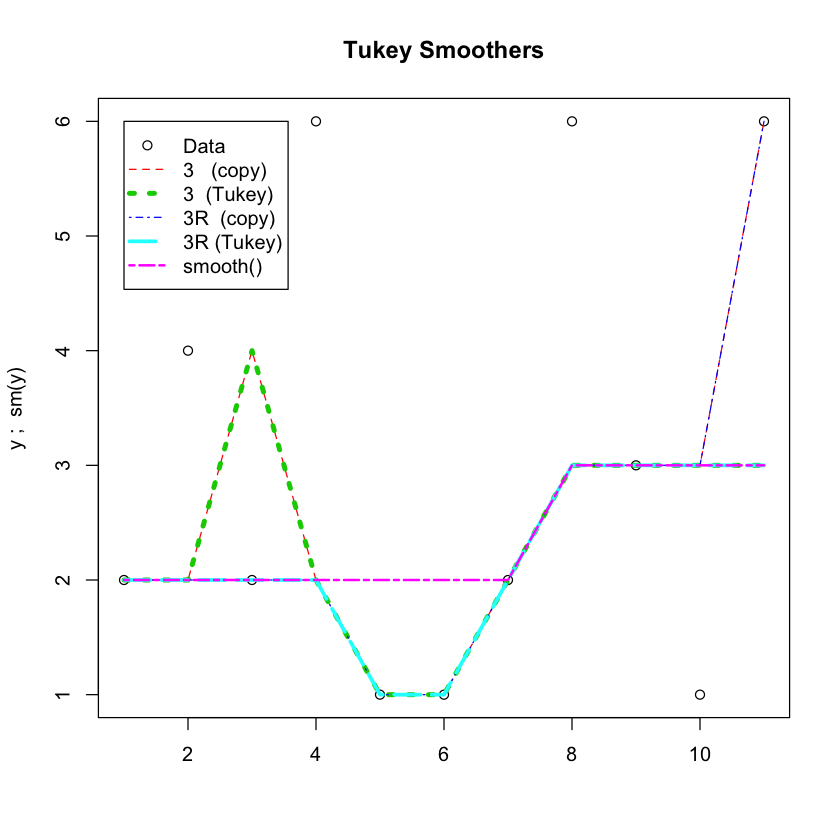

In [15]:
print(t(showSmooth(c(2, 4, 2, 6, 1, 1, 2, 6, 3, 1, 6))))

    [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11]
x      4    1    3    6    6    4    1    6    2     4     2
3c     4    3    3    6    6    4    4    2    4     2     2
3      3    3    3    6    6    4    4    2    4     2     2
3Rc    4    3    3    6    6    4    4    4    2     2     2
3R     3    3    3    6    6    4    4    4    2     2     2
sm     3    3    3    3    4    4    4    4    2     2     2


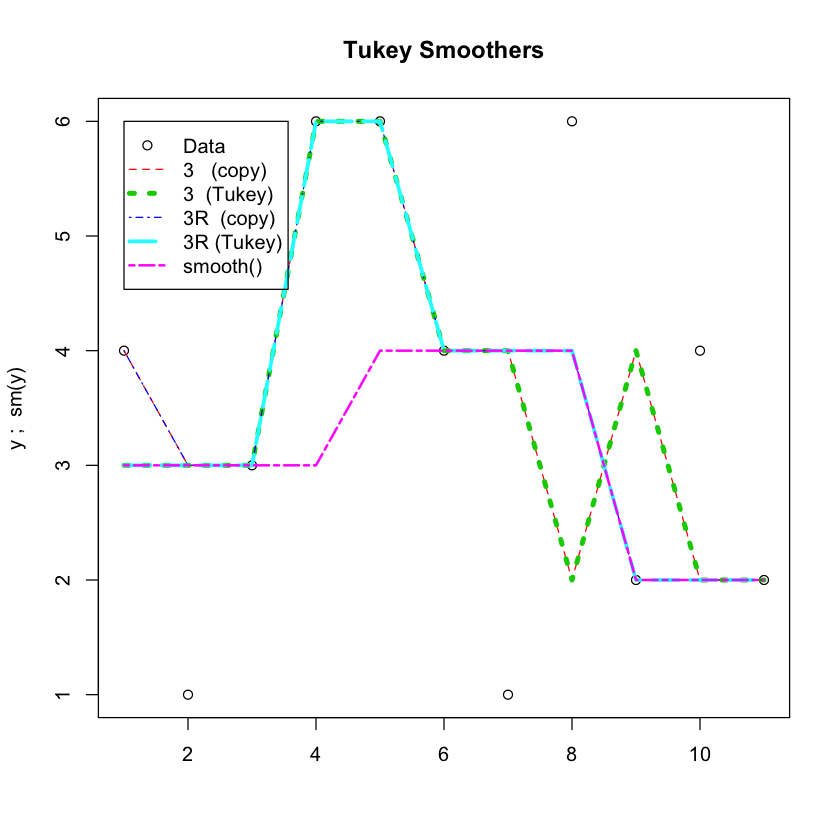

In [16]:
print(t(showSmooth(x1)))

In [17]:
par(op)